In [1]:
# Autoreload
%load_ext autoreload
%autoreload 2

# Warnings
import warnings
warnings.filterwarnings('ignore')

# XGBoost

### Import libraries and data

In [2]:
import pandas as pd # data manipulation
import numpy as np # linear algebra
import matplotlib.pyplot as plt # visualization

In [3]:
processed_test_df = pd.read_csv('../data/processed_test_2.csv')
processed_val_df = pd.read_csv('../data/processed_val_2.csv')

### Prepare data

In [4]:
X = processed_val_df.drop('log_demanda_uni_equil', axis=1)
y = processed_val_df['log_demanda_uni_equil']

In [5]:
from bimbo.xgboost_models import *

In [6]:
model = build_model(X, y)

[20:42:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:42:19] WARNING: src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[0]	validation_0-mae:0.800587	validation_0-rmse:1.01923	validation_1-mae:0.800826	validation_1-rmse:1.01962
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 1 rounds.
[1]	validation_0-mae:0.608212	validation_0-rmse:0.787414	validation_1-mae:0.608366	validation_1-rmse:0.787816
[2]	validation_0-mae:0.493993	validation_0-rmse:0.642053	validation_1-mae:0.494141	validation_1-rmse:0.642496
[3]	validation_0-mae:0.427637	validation_0-rmse:0.556406	validation_1-mae:0.427694	validation_1-rmse:0.556839
[4]	validation_0-mae:0.389689	validation_0-rmse:0.508673	validation_1-mae:0.389727	va

[70]	validation_0-mae:0.334544	validation_0-rmse:0.447519	validation_1-mae:0.335212	validation_1-rmse:0.448933
[71]	validation_0-mae:0.334523	validation_0-rmse:0.447479	validation_1-mae:0.335202	validation_1-rmse:0.448914
[72]	validation_0-mae:0.3345	validation_0-rmse:0.44746	validation_1-mae:0.335184	validation_1-rmse:0.448899
[73]	validation_0-mae:0.33445	validation_0-rmse:0.447413	validation_1-mae:0.335142	validation_1-rmse:0.448858
[74]	validation_0-mae:0.334399	validation_0-rmse:0.447356	validation_1-mae:0.335102	validation_1-rmse:0.448817
[75]	validation_0-mae:0.334379	validation_0-rmse:0.447327	validation_1-mae:0.335087	validation_1-rmse:0.448795
[76]	validation_0-mae:0.33434	validation_0-rmse:0.447282	validation_1-mae:0.335067	validation_1-rmse:0.448769
[77]	validation_0-mae:0.334314	validation_0-rmse:0.447261	validation_1-mae:0.335045	validation_1-rmse:0.448755
[78]	validation_0-mae:0.334285	validation_0-rmse:0.44721	validation_1-mae:0.335018	validation_1-rmse:0.448719
[79]	va

[144]	validation_0-mae:0.332868	validation_0-rmse:0.445218	validation_1-mae:0.334049	validation_1-rmse:0.44747
[145]	validation_0-mae:0.332852	validation_0-rmse:0.445184	validation_1-mae:0.334044	validation_1-rmse:0.447452
[146]	validation_0-mae:0.332838	validation_0-rmse:0.445165	validation_1-mae:0.334036	validation_1-rmse:0.447445
[147]	validation_0-mae:0.332826	validation_0-rmse:0.44515	validation_1-mae:0.334026	validation_1-rmse:0.447436
[148]	validation_0-mae:0.332824	validation_0-rmse:0.445137	validation_1-mae:0.334026	validation_1-rmse:0.447433
[149]	validation_0-mae:0.332813	validation_0-rmse:0.445115	validation_1-mae:0.334022	validation_1-rmse:0.447423
[150]	validation_0-mae:0.332793	validation_0-rmse:0.445096	validation_1-mae:0.33401	validation_1-rmse:0.447415
[151]	validation_0-mae:0.332785	validation_0-rmse:0.445084	validation_1-mae:0.334008	validation_1-rmse:0.447408
[152]	validation_0-mae:0.332774	validation_0-rmse:0.445064	validation_1-mae:0.334003	validation_1-rmse:0.44

### Save model to file

In [7]:
# save model to file (pickle & joblib)
save_model(model, "model_4")

Saved model to: model_4.pickle.dat
Saved model to: model_4.joblib.dat


### Submit to Kaggle

In [8]:
loaded_model = load_model("model_4")

[21:58:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Loaded model from: model_4.joblib.dat


In [9]:
submit_df = submit_model(processed_test_df, loaded_model, "result_4")

In [10]:
submit_df

,id,Demanda_uni_equil
0,0,4
1,1,1
2,2,2
3,3,1
4,4,3
5,5,3
6,6,1
7,7,6
8,8,5
9,9,5


### Check Submit normality

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y,
        test_size=0.5, random_state=42)

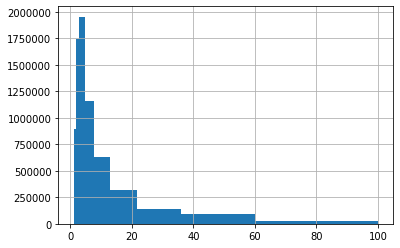

In [12]:
submit_df['Demanda_uni_equil'].hist(bins=np.logspace(0, 2, 10))

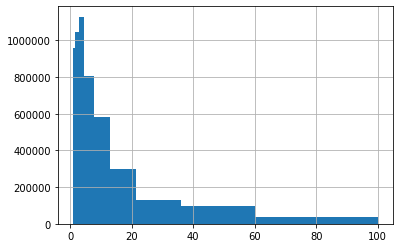

In [13]:
X_train['Demanda_uni_equil'].hist(bins=np.logspace(0, 2, 10))

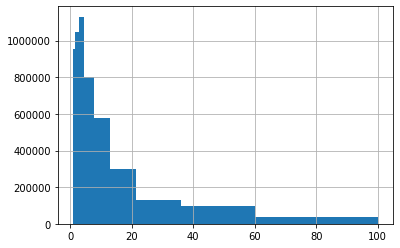

In [14]:
X_val['Demanda_uni_equil'].hist(bins=np.logspace(0, 2, 10))

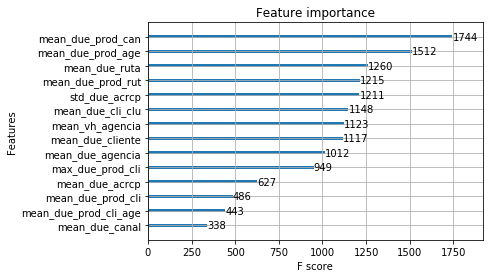

In [15]:
from xgboost import plot_importance

# plot feature importance
plot_importance(loaded_model)
plt.show()

### Data analysis

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y,
        test_size=0.5, random_state=42)

X_train.drop(['Demanda_uni_equil'], axis=1, inplace=True)
X_val.drop(['Demanda_uni_equil'], axis=1, inplace=True)

In [6]:
X_train.head()

,mean_due_agencia,mean_due_canal,mean_due_ruta,mean_due_cliente,mean_due_prod_age,mean_due_prod_rut,mean_due_prod_cli,mean_due_prod_can,mean_due_prod_cli_age,mean_vh_agencia,std_due_acrcp,mean_due_acrcp,mean_due_cli_clu,max_due_prod_cli
8965983,1.586070,1.531248,1.383516,1.227744,1.960876,1.563483,2.397895,1.714396,2.397895,3.504425,NaN,2.397895,2.397895,2.397895
4293662,1.656362,1.531248,1.473225,1.722871,1.375348,1.588503,1.011404,1.323146,1.011404,3.554017,0.270530,1.011404,1.011404,1.386294
2567855,1.618759,1.531248,1.626152,1.837330,1.314100,1.391168,2.379244,1.307217,2.379244,3.527976,0.210362,2.379244,2.379244,2.708050
5409366,1.505310,1.531248,1.392407,1.604097,1.602259,1.648762,1.861792,1.826642,1.861792,3.416194,0.168236,1.861792,1.861792,1.945910
3799794,1.560092,1.531248,1.455321,1.705450,1.282299,1.094029,1.919121,1.342757,1.919121,3.400005,0.255247,1.919121,1.919121,2.302585


In [7]:
X_val.head()

,mean_due_agencia,mean_due_canal,mean_due_ruta,mean_due_cliente,mean_due_prod_age,mean_due_prod_rut,mean_due_prod_cli,mean_due_prod_can,mean_due_prod_cli_age,mean_vh_agencia,std_due_acrcp,mean_due_acrcp,mean_due_cli_clu,max_due_prod_cli
33031,1.642640,1.531248,1.676248,1.425160,1.320071,1.242061,1.075056,1.108049,1.075056,3.623830,0.247178,1.075056,1.075056,1.386294
7741310,1.550272,1.531248,1.488170,1.693363,1.258784,1.337715,1.868456,1.194150,1.868456,3.444801,0.657156,1.868456,1.868456,2.484907
4373345,1.603429,1.531248,1.642443,1.082926,1.405441,1.733332,1.098612,1.660725,1.098612,3.529393,NaN,1.098612,1.098612,1.098612
4058089,1.571484,1.531248,1.367739,1.388659,1.375011,1.089410,0.693147,1.399525,0.693147,3.383000,NaN,0.693147,0.693147,0.693147
6712458,1.516733,1.531248,1.333497,NaN,3.014718,2.161567,NaN,2.945578,NaN,3.334405,NaN,NaN,NaN,NaN


In [8]:
y_train.head()

8965983    1.791760
4293662    0.693147
2567855    2.197225
5409366    1.386294
3799794    1.098612
Name: log_demanda_uni_equil, dtype: float64

In [9]:
y_val.head()

33031      1.098612
7741310    1.945910
4373345    1.098612
4058089    0.693147
6712458    1.791760
Name: log_demanda_uni_equil, dtype: float64

In [17]:
# make predictions for test data and evaluate
predictions = loaded_model.predict(X_val)

In [18]:
final_predictions = np.expm1(predictions).round().astype(int)
final_y_val = np.expm1(y_val).round().astype(int)

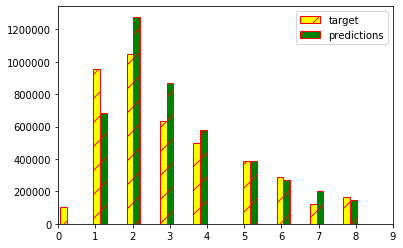

In [19]:
x1 = final_y_val
x2 = pd.Series(final_predictions)
bins = 10000

plt.hist([x1, x2], bins = bins, color = ['yellow', 'green'],
            edgecolor = 'red', hatch = '/', label = ['target', 'predictions'],
            histtype = 'bar')
plt.legend(loc='upper right')
plt.xlim(0, 9)
plt.show()